# Data Cleaning
In this section, we will read the data from the csv file and store it in a pandas dataframe. Thereafter we will perform some basic data exploration to get rid of any missing values, useless columns and outliers.

In [4]:
# import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import sklearn as sk



# Read the data Train on me
dataframe= pd.read_csv('Train.csv')


### Let's start with Y and x~5
Here I'm trying to interpret the data visually. X_5  column is zeroes regardless of the output. Also we we do know exactly how many unique values there are in each column. I'm going to try to find out how many unique values there are in each column. Also I am trying to find the dimensionality of each data 

In [5]:
# Find the dimensionality of the y variable
dataframe['y'].value_counts()




Dragspel       559
Nyckelharpa    231
Serpent        210
Name: y, dtype: int64

### Cleaning zero-values from the data
I found that the data had some missing values. They are now fixed in the y column and x_5 column. I also found that the x_5 column was useless. It was all zeroes. I removed it from the dataframe.

In [9]:
# Drop the entire x5 column
#dataframe.drop('x5', axis=1, inplace=True)

# visualize the data
dtale.show(dataframe)


C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dtale\views.py:755: FutureWarning:

['x6', 'x11', 'x12'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [12]:
# Checking x1 variable for outliers and missing values

# How many unique values are there in x1 and non values
dataframe['x1'].value_counts()
dataframe['x1'].isnull().sum()

# Find in column x1 where we get '?' and replace it with NaN
dataframe['x1'].replace('?', np.nan, inplace=True)

# Find the outliers
dataframe['x1'].describe()


count         999
unique        998
top       1.29336
freq            2
Name: x1, dtype: object

In [20]:
# Clean X2
dataframe['x2'].value_counts()
dataframe['x2'].isnull().sum()
dataframe['x2'].replace('?', np.nan, inplace=True)

# Clean all zeroes in x3,x4,x7,x8,x9,x10,x12,x13
dataframe['x3'].replace(0, np.nan, inplace=True)
dataframe['x4'].replace(0, np.nan, inplace=True)
dataframe['x7'].replace(0, np.nan, inplace=True)
dataframe['x8'].replace(0, np.nan, inplace=True)
dataframe['x9'].replace(0, np.nan, inplace=True)
dataframe['x10'].replace(0, np.nan, inplace=True)
dataframe['x12'].replace(0, np.nan, inplace=True)
dataframe['x13'].replace(0, np.nan, inplace=True)

In [21]:
# Looking for missspelled values in x6
dataframe['x6'].value_counts()




Slussen              296
Entrée               152
Brinnelvägen 8       125
Lindstedsvägen 24     73
KTH Biblioteket       66
Östra stationen       57
Ostra station          1
Name: x6, dtype: int64

In [33]:
# Where it says "Ostra stationen" in column x6, replace it with "Ostra station"
dataframe['x6'].replace('Ostra stationen', 'Ostra station', inplace=True)

### Fixing Data Type conversions 
There might be a risk that some columns which should contain only strings, contains numbers. This needs to be checked for

In [32]:
# Check the datatypes of the columns
dataframe.dtypes


y       object
x1      object
x2     float64
x3     float64
x4     float64
x6      object
x7     float64
x8     float64
x9     float64
x10    float64
x11     object
x12     object
x13    float64
dtype: object

In [36]:
# X1, x13 and x12 have other values than just numbers, so we need to convert them to numbers
dataframe['x1'] = pd.to_numeric(dataframe['x1'])
dataframe['x13'] = pd.to_numeric(dataframe['x13'])

y       object
x1     float64
x2     float64
x3     float64
x4     float64
x6      object
x7     float64
x8     float64
x9     float64
x10    float64
x11     object
x12     object
x13    float64
dtype: object

# Data Exploration and Visualization
In this section, we will explore the data and try to find some interesting patterns. We will also try to visualize the data to get a better understanding of the data.

## Finding correlations between the data

### Correlation between the data
Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here

C:\Users\rakin\AppData\Local\Temp\ipykernel_2584\1492249446.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\rakin\AppData\Local\Temp\ipykernel_2584\1492249446.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

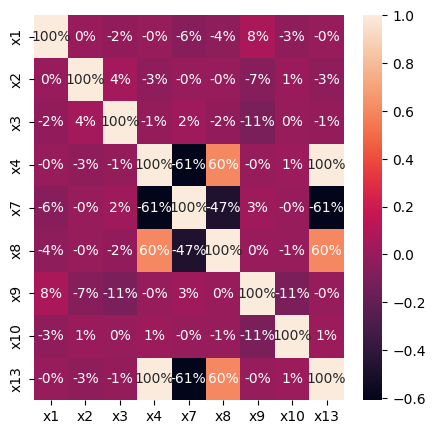

In [48]:
# Do a correlation matrix
dataframe.corr()

# Plotting the heat map
plt.figure(figsize=(5,5))
sns.heatmap(dataframe.corr(), annot=True, fmt='.0%')

### Recursive Feature Elimination
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features, and each feature’s importance is obtained either through a coef_ attribute or a feature_importances_ attribute.
Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached


C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Loc

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Slussen'
